In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("newunicorn.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub
0,ByteDance,$140.00,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance
1,SpaceX,$127.00,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex
2,SHEIN,$100.00,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein
3,Stripe,$95.00,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe
4,Canva,$40.00,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva
...,...,...,...,...,...,...,...,...
1200,Zhaogang,$1.00,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang
1201,Zhuan Zhuan,$1.00,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan
1202,Zihaiguo,$1.00,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo
1203,Zopa,$1.00,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa


In [3]:
df["Valuation ($B)"] = df['Valuation ($B)'].str.replace('$', '').astype(float)
df

C:\Users\jim13\AppData\Local\Temp\ipykernel_68392\905620081.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Valuation ($B)"] = df['Valuation ($B)'].str.replace('$', '').astype(float)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub
0,ByteDance,140.0,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance
1,SpaceX,127.0,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex
2,SHEIN,100.0,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein
3,Stripe,95.0,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe
4,Canva,40.0,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva
...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang
1201,Zhuan Zhuan,1.0,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan
1202,Zihaiguo,1.0,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo
1203,Zopa,1.0,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa


In [4]:
# convert to number of seconds after 1970/1/1

df['Date Joined'] = pd.to_datetime(df['Date Joined'], format='%m/%d/%y').apply(lambda x: pd.Timestamp(x).timestamp())
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub
0,ByteDance,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance
1,SpaceX,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex
2,SHEIN,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein
3,Stripe,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe
4,Canva,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva
...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang
1201,Zhuan Zhuan,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan
1202,Zihaiguo,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo
1203,Zopa,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa


In [5]:
Xc1 = pd.get_dummies(df["Country"]) #clean data using dummies/one hot encoder
Xc2 = pd.get_dummies(df["Industry"])
y = df["Valuation ($B)"]

In [6]:
df['Select Investors'] = df['Select Investors'].fillna('')
investor = df['Select Investors'].apply(lambda x: x.split(', '))
investor

0       [Sequoia Capital China, SIG Asia Investments, ...
1       [Founders Fund, Draper Fisher Jurvetson, Rothe...
2       [Tiger Global Management, Sequoia Capital Chin...
3           [Khosla Ventures, LowercaseCapital, capitalG]
4       [Sequoia Capital China, Blackbird Ventures, Ma...
                              ...                        
1200    [K2 Ventures, Matrix Partners China, IDG Capital]
1201                           [58.com, Tencent Holdings]
1202    [Xingwang Investment Management, China Capital...
1203    [IAG Capital Partners, Augmentum Fintech, Nort...
1204    [Novator Partners, True, Causeway Media Partners]
Name: Select Investors, Length: 1205, dtype: object

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the MultiLabelBinarizer to the data and transform the data
investor_matrix = mlb.fit_transform(investor)

# Create a new DataFrame with the transformed data
investor_df = pd.DataFrame(investor_matrix, columns=mlb.classes_)

In [8]:
investor_df

,,.406 Ventures,01 Advisors,01 Advisors. Kleiner Perkins Caufield & Byers. Andreessen Horowitz,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,...,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,kt investment,next47,s28 Capital
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = pd.concat([df['Date Joined'], Xc1,Xc2,investor_df], axis=1)
X

,Date Joined,Argentina,Australia,Austria,Belgium,Bermuda,Brazil,Canada,Chile,China,...,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,kt investment,next47,s28 Capital
0,1.491523e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.354320e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.530576e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.390435e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.515370e+09,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.498694e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1201,1.492474e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1202,1.620259e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1203,1.634602e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Date Joined,Argentina,Australia,Austria,Belgium,Bermuda,Brazil,Canada,Chile,China,...,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,kt investment,next47,s28 Capital
403,1.597622e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
641,1.616112e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,1.561594e+09,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1.524701e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
435,1.644278e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.655165e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,1.647302e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,1.652054e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,1.603325e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train

403      2.31
641      1.50
181      4.25
8       33.00
435      2.10
        ...  
715      1.40
905      1.10
1096     1.00
235      3.60
1061     1.00
Name: Valuation ($B), Length: 964, dtype: float64

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [59]:
rf = RandomForestRegressor(n_estimators=150, random_state=1)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: -0.7691469527976409


In [51]:
import pandas as pd

importances = rf.feature_importances_
feature_names = [X_test.columns[i] for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.DataFrame({"feature":feature_names, "importances": importances})

forest_importances = forest_importances.sort_values(by = "importances", ascending=False)
forest_importances

,feature,importances
1180,Sina Weibo,0.156222
839,LowercaseCapital,0.121737
450,Draper Fisher Jurvetson,0.117571
1104,Rothenberg Ventures,0.099570
1126,SIG Asia Investments,0.064525
...,...,...
633,Group GSR Ventures,0.000000
192,"B Capital Group,",0.000000
636,Guggenheim Investments,0.000000
196,BDC Capital,0.000000


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 20000x30000 with 0 Axes>

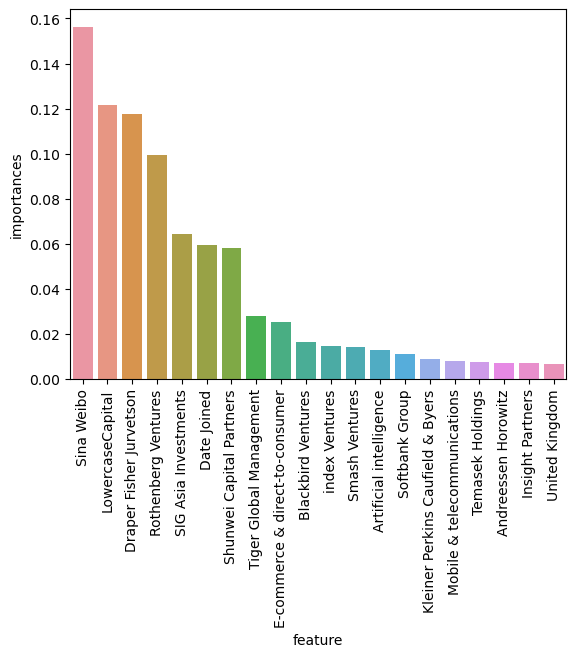

<Figure size 20000x30000 with 0 Axes>

In [52]:
sns.barplot(forest_importances["feature"][0:20],forest_importances["importances"][0:20])
plt.xticks(rotation = 90)
plt.figure(figsize=[200,300])

In [36]:
import shap

In [37]:
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 242it [01:25,  2.56it/s]                                                                        


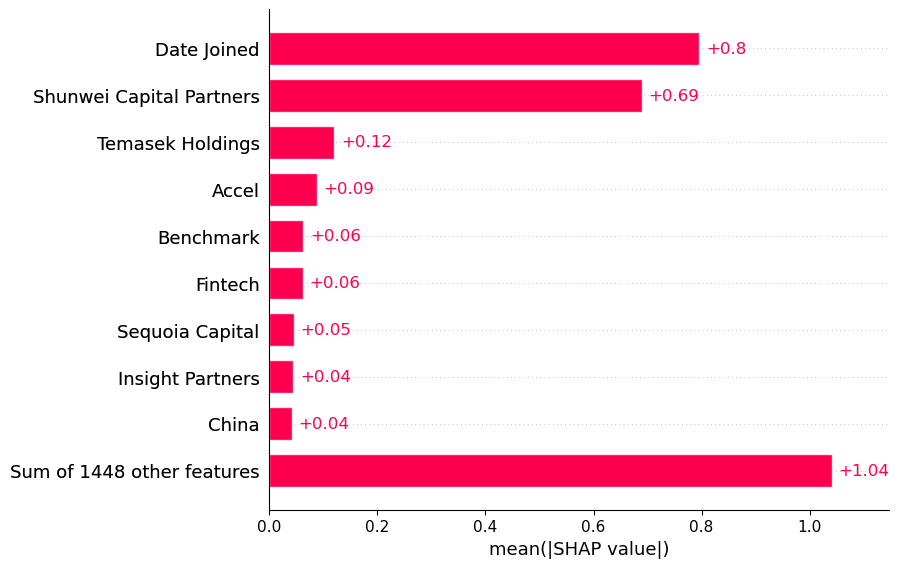

In [38]:
shap.plots.bar(shap_values)

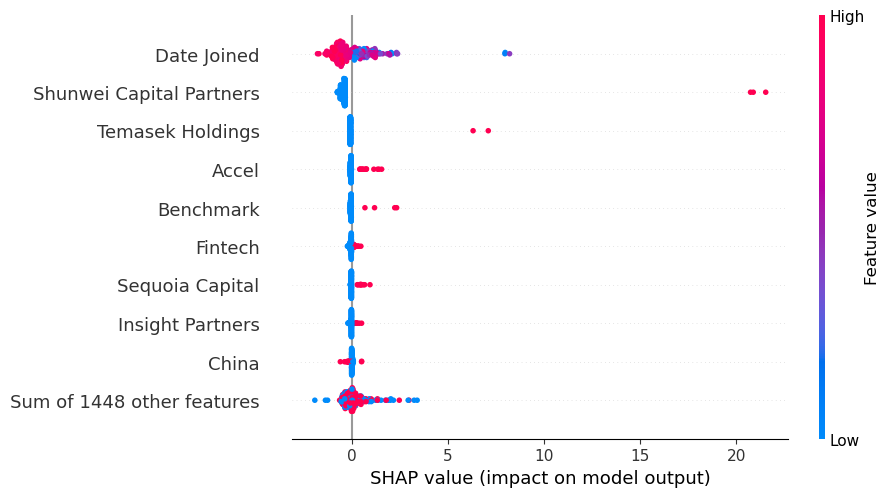

In [39]:
shap.plots.beeswarm(shap_values)

In [24]:
y_pred

array([ 2.28253333,  1.5744    ,  1.48626667,  1.48353333,  6.20933333,
        1.1756    ,  1.48433333,  3.86793333,  3.8288    ,  1.30146667,
        1.96433333, 29.77946667,  2.70986667,  1.801     ,  1.38626667,
        1.04466667,  1.69666667,  2.49293333,  1.13733333,  4.75113333,
        1.41686667,  1.88666667,  1.57413333,  1.59313333,  1.04      ,
        2.4988    ,  1.21966667,  3.215     ,  2.4044    , 29.95146667,
        1.03066667,  1.9164    ,  1.5478    ,  1.46973333,  1.54193333,
        1.5112    ,  1.98593333,  6.93946667,  1.25446667,  1.71253333,
        1.63053333,  2.10653333,  1.71433333,  1.6468    ,  2.0476    ,
        1.44526667,  1.22946667,  1.40686667,  1.1936    ,  1.27033333,
        1.93353333,  1.63626667,  3.7066    ,  2.04106667,  1.39606667,
        1.41346667,  1.19946667,  1.2056    ,  1.31093333,  1.06466667,
        1.14813333,  1.1976    ,  1.187     ,  1.90273333,  1.73093333,
        1.65046667,  2.44233333,  2.4688    ,  1.48233333,  2.66

In [25]:
y_test

198     4.00
301     3.00
311     3.00
834     1.20
321     3.00
        ... 
1101    1.00
793     1.25
755     1.30
940     1.00
808     1.22
Name: Valuation ($B), Length: 241, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train,y_train)
y_pred = slr.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

-9075265.160890339

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

104248198.46010861

In [29]:
print("Intercept: \n", slr.intercept_)
print("Coefficients: \n", slr.coef_)

Intercept: 
 -14169.587443052384
Coefficients: 
 [-1.97880341e-08  3.02208075e+05  2.52252933e+03 ...  0.00000000e+00
  3.28967571e+00  1.66631625e+00]


In [57]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb


In [58]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2}")

R-squared score: -6.976581065341309
